generate test data


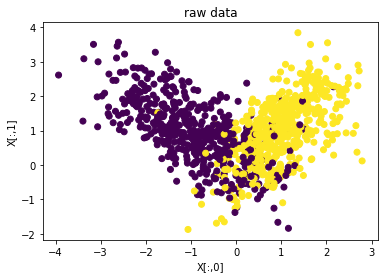

[[-0.30383114 -0.31524192]
 [-1.57902621  0.9132736 ]
 [ 2.01559853  0.92793037]
 ..., 
 [-0.883716    0.27946108]
 [ 2.05923534  1.96412965]
 [-2.1460431   1.83034363]]
[0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 

In [34]:
#coding=utf-8

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

def generate_data(data_num, data_dim, show_data=True):
    X, Y = make_classification(n_samples=data_num, n_features=data_dim, n_redundant=0, n_clusters_per_class=1,  n_classes=2)
    
    if show_data:
        plt.scatter(X[:,0], X[:,1], marker="o", c=Y)
        plt.title("raw data")
        plt.xlabel("X[:,0]")
        plt.ylabel("X[:,1]")
        plt.show()

    return X, Y

def make_example(features, label):
    ex = tf.train.Example(
        features = tf.train.Features(
            feature = {
                "data": tf.train.Feature(float_list=tf.train.FloatList(value=features)),
                "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[label])) # [label]必须用“[]”[]括起来
            }
        )
    )
    return ex

def generate_tfrecords(data_num, data_dim, filename):
    X, Y = generate_data(data_num, data_dim, False)
    print(X)
    print(Y)
    writer = tf.python_io.TFRecordWriter(filename)
    print(zip(X,Y))
    for x, y in zip(X, Y):
        ex = make_example(x, y)
        writer.write(ex.SerializeToString())
    writer.close()

if __name__ == "__main__":
    print("generate test data")
    generate_tfrecords(1000, 2, "lr.tfrecords")

In [35]:
% run train_lr_model.py

the loss is 0.691648 and the accuracy is 0.656250
the loss is 0.653416 and the accuracy is 0.781250
the loss is 0.641456 and the accuracy is 0.750000
the loss is 0.615398 and the accuracy is 0.843750
the loss is 0.542150 and the accuracy is 0.968750
the loss is 0.574484 and the accuracy is 0.750000
the loss is 0.519985 and the accuracy is 0.875000
the loss is 0.484887 and the accuracy is 0.875000
the loss is 0.483290 and the accuracy is 0.843750
the loss is 0.446350 and the accuracy is 0.875000
the loss is 0.439576 and the accuracy is 0.875000
the loss is 0.506826 and the accuracy is 0.812500
the loss is 0.468004 and the accuracy is 0.843750
the loss is 0.366150 and the accuracy is 0.937500
the loss is 0.442967 and the accuracy is 0.843750
the loss is 0.353247 and the accuracy is 0.906250
the loss is 0.382719 and the accuracy is 0.843750
the loss is 0.306281 and the accuracy is 0.968750
the loss is 0.393161 and the accuracy is 0.812500
the loss is 0.411221 and the accuracy is 0.812500


the loss is 0.440314 and the accuracy is 0.812500
the loss is 0.529499 and the accuracy is 0.812500
the loss is 0.200663 and the accuracy is 0.937500
the loss is 0.236639 and the accuracy is 0.843750
the loss is 0.515836 and the accuracy is 0.781250
the loss is 0.243068 and the accuracy is 0.906250
the loss is 0.590590 and the accuracy is 0.781250
the loss is 0.277245 and the accuracy is 0.843750
the loss is 0.273743 and the accuracy is 0.875000
the loss is 0.219813 and the accuracy is 0.906250
the loss is 0.243256 and the accuracy is 0.937500
the loss is 0.345528 and the accuracy is 0.781250
the loss is 0.297661 and the accuracy is 0.875000
the loss is 0.258039 and the accuracy is 0.875000
the loss is 0.326117 and the accuracy is 0.875000
the loss is 0.437819 and the accuracy is 0.812500
the loss is 0.214047 and the accuracy is 0.937500
the loss is 0.260525 and the accuracy is 0.906250
the loss is 0.213701 and the accuracy is 0.906250
the loss is 0.463999 and the accuracy is 0.750000


the loss is 0.276959 and the accuracy is 0.875000
the loss is 0.285421 and the accuracy is 0.906250
the loss is 0.220286 and the accuracy is 0.937500
the loss is 0.279614 and the accuracy is 0.906250
the loss is 0.226419 and the accuracy is 0.937500
the loss is 0.281242 and the accuracy is 0.875000
the loss is 0.266015 and the accuracy is 0.843750
the loss is 0.150005 and the accuracy is 0.968750
the loss is 0.253462 and the accuracy is 0.875000
the loss is 0.230704 and the accuracy is 0.937500
the loss is 0.270180 and the accuracy is 0.875000
the loss is 0.346762 and the accuracy is 0.875000
the loss is 0.374101 and the accuracy is 0.812500
the loss is 0.473536 and the accuracy is 0.812500
the loss is 0.343936 and the accuracy is 0.875000
the loss is 0.307993 and the accuracy is 0.812500
the loss is 0.293080 and the accuracy is 0.843750
the loss is 0.458133 and the accuracy is 0.781250
the loss is 0.222836 and the accuracy is 0.843750
the loss is 0.330786 and the accuracy is 0.812500


the loss is 0.296870 and the accuracy is 0.843750
the loss is 0.419622 and the accuracy is 0.781250
the loss is 0.294710 and the accuracy is 0.875000
the loss is 0.438719 and the accuracy is 0.843750
the loss is 0.245743 and the accuracy is 0.875000
the loss is 0.288087 and the accuracy is 0.875000
the loss is 0.213283 and the accuracy is 0.906250
the loss is 0.518420 and the accuracy is 0.750000
the loss is 0.291478 and the accuracy is 0.875000
the loss is 0.436139 and the accuracy is 0.812500
the loss is 0.164810 and the accuracy is 0.906250
the loss is 0.365922 and the accuracy is 0.843750
the loss is 0.396884 and the accuracy is 0.750000
the loss is 0.296020 and the accuracy is 0.781250
the loss is 0.337001 and the accuracy is 0.812500
the loss is 0.095298 and the accuracy is 0.968750
the loss is 0.323680 and the accuracy is 0.937500
the loss is 0.323872 and the accuracy is 0.875000
the loss is 0.394686 and the accuracy is 0.812500
the loss is 0.300665 and the accuracy is 0.937500


the loss is 0.424491 and the accuracy is 0.781250
the loss is 0.248397 and the accuracy is 0.906250
the loss is 0.168414 and the accuracy is 0.906250
the loss is 0.362028 and the accuracy is 0.781250
the loss is 0.200113 and the accuracy is 0.906250
the loss is 0.173073 and the accuracy is 0.937500
the loss is 0.252939 and the accuracy is 0.968750
the loss is 0.303917 and the accuracy is 0.843750
the loss is 0.363710 and the accuracy is 0.875000
the loss is 0.264256 and the accuracy is 0.875000
the loss is 0.298914 and the accuracy is 0.875000
the loss is 0.309204 and the accuracy is 0.906250
the loss is 0.203727 and the accuracy is 0.906250
the loss is 0.526046 and the accuracy is 0.750000
the loss is 0.351900 and the accuracy is 0.812500
the loss is 0.301121 and the accuracy is 0.875000
the loss is 0.183260 and the accuracy is 0.937500
the loss is 0.306491 and the accuracy is 0.875000
the loss is 0.180960 and the accuracy is 0.906250
the loss is 0.345950 and the accuracy is 0.843750


the loss is 0.171142 and the accuracy is 0.937500
the loss is 0.543116 and the accuracy is 0.718750
the loss is 0.224898 and the accuracy is 0.937500
the loss is 0.312811 and the accuracy is 0.843750
the loss is 0.211532 and the accuracy is 0.875000
the loss is 0.208169 and the accuracy is 0.906250
the loss is 0.336828 and the accuracy is 0.875000
the loss is 0.373418 and the accuracy is 0.781250
the loss is 0.235101 and the accuracy is 0.875000
the loss is 0.120948 and the accuracy is 0.968750
the loss is 0.303481 and the accuracy is 0.937500
the loss is 0.101168 and the accuracy is 0.968750
the loss is 0.313410 and the accuracy is 0.812500
the loss is 0.381940 and the accuracy is 0.843750
the loss is 0.247790 and the accuracy is 0.875000
the loss is 0.423135 and the accuracy is 0.781250
the loss is 0.279121 and the accuracy is 0.906250
the loss is 0.144938 and the accuracy is 0.968750
the loss is 0.371505 and the accuracy is 0.843750
the loss is 0.464617 and the accuracy is 0.875000


the loss is 0.542986 and the accuracy is 0.781250
the loss is 0.274997 and the accuracy is 0.843750
the loss is 0.281216 and the accuracy is 0.937500
the loss is 0.149956 and the accuracy is 0.968750
the loss is 0.163349 and the accuracy is 0.937500
the loss is 0.301550 and the accuracy is 0.875000
the loss is 0.416338 and the accuracy is 0.812500
the loss is 0.479064 and the accuracy is 0.812500
the loss is 0.357353 and the accuracy is 0.906250
the loss is 0.351376 and the accuracy is 0.781250
the loss is 0.339586 and the accuracy is 0.843750
the loss is 0.378808 and the accuracy is 0.843750
the loss is 0.255923 and the accuracy is 0.906250
the loss is 0.316078 and the accuracy is 0.843750
the loss is 0.531897 and the accuracy is 0.750000
the loss is 0.323853 and the accuracy is 0.812500
the loss is 0.186898 and the accuracy is 0.937500
the loss is 0.366851 and the accuracy is 0.781250
the loss is 0.259466 and the accuracy is 0.875000
the loss is 0.164955 and the accuracy is 0.906250


the loss is 0.295349 and the accuracy is 0.906250
the loss is 0.170732 and the accuracy is 0.937500
the loss is 0.182986 and the accuracy is 0.937500
the loss is 0.420540 and the accuracy is 0.781250
the loss is 0.695193 and the accuracy is 0.718750
the loss is 0.200346 and the accuracy is 0.937500
the loss is 0.358980 and the accuracy is 0.906250
the loss is 0.146665 and the accuracy is 0.968750
the loss is 0.468214 and the accuracy is 0.843750
the loss is 0.364442 and the accuracy is 0.875000
the loss is 0.125642 and the accuracy is 1.000000
the loss is 0.261398 and the accuracy is 0.968750
the loss is 0.241460 and the accuracy is 0.875000
the loss is 0.321579 and the accuracy is 0.843750
the loss is 0.245797 and the accuracy is 0.906250
the loss is 0.270228 and the accuracy is 0.906250
the loss is 0.291653 and the accuracy is 0.875000
the loss is 0.227845 and the accuracy is 0.968750
the loss is 0.248359 and the accuracy is 0.906250
the loss is 0.435122 and the accuracy is 0.781250


the loss is 0.277211 and the accuracy is 0.875000
the loss is 0.311363 and the accuracy is 0.906250
the loss is 0.322756 and the accuracy is 0.875000
the loss is 0.535643 and the accuracy is 0.812500
the loss is 0.298431 and the accuracy is 0.875000
the loss is 0.239779 and the accuracy is 0.875000
the loss is 0.277040 and the accuracy is 0.875000
the loss is 0.226808 and the accuracy is 0.937500
the loss is 0.217962 and the accuracy is 0.906250
the loss is 0.258391 and the accuracy is 0.875000
the loss is 0.422551 and the accuracy is 0.812500
the loss is 0.195996 and the accuracy is 0.906250
the loss is 0.262550 and the accuracy is 0.906250
the loss is 0.213328 and the accuracy is 0.906250
the loss is 0.318398 and the accuracy is 0.812500
the loss is 0.282241 and the accuracy is 0.875000
the loss is 0.389232 and the accuracy is 0.812500
the loss is 0.337798 and the accuracy is 0.875000
the loss is 0.315688 and the accuracy is 0.843750
the loss is 0.240386 and the accuracy is 0.875000


the loss is 0.359528 and the accuracy is 0.781250
the loss is 0.214198 and the accuracy is 0.875000
the loss is 0.303959 and the accuracy is 0.812500
the loss is 0.225242 and the accuracy is 0.906250
the loss is 0.193798 and the accuracy is 0.906250
the loss is 0.291202 and the accuracy is 0.875000
the loss is 0.332154 and the accuracy is 0.875000
the loss is 0.307921 and the accuracy is 0.843750
the loss is 0.275951 and the accuracy is 0.906250
the loss is 0.442009 and the accuracy is 0.781250
the loss is 0.261699 and the accuracy is 0.875000
the loss is 0.210541 and the accuracy is 0.906250
the loss is 0.257933 and the accuracy is 0.906250
the loss is 0.191557 and the accuracy is 0.906250
the loss is 0.232648 and the accuracy is 0.906250
the loss is 0.479441 and the accuracy is 0.843750
the loss is 0.411432 and the accuracy is 0.812500
the loss is 0.321354 and the accuracy is 0.875000
the loss is 0.280373 and the accuracy is 0.843750
the loss is 0.285255 and the accuracy is 0.843750


the loss is 0.244935 and the accuracy is 0.875000
the loss is 0.354229 and the accuracy is 0.875000
the loss is 0.197051 and the accuracy is 0.875000
the loss is 0.330413 and the accuracy is 0.843750
the loss is 0.331459 and the accuracy is 0.875000
the loss is 0.326534 and the accuracy is 0.812500
the loss is 0.387134 and the accuracy is 0.875000
the loss is 0.277977 and the accuracy is 0.875000
the loss is 0.285085 and the accuracy is 0.843750
the loss is 0.310230 and the accuracy is 0.875000
the loss is 0.359064 and the accuracy is 0.843750
the loss is 0.393494 and the accuracy is 0.812500
the loss is 0.345414 and the accuracy is 0.906250
the loss is 0.225009 and the accuracy is 0.937500
the loss is 0.322793 and the accuracy is 0.843750
the loss is 0.440421 and the accuracy is 0.875000
the loss is 0.257104 and the accuracy is 0.906250
the loss is 0.202565 and the accuracy is 0.906250
the loss is 0.438981 and the accuracy is 0.781250
the loss is 0.268514 and the accuracy is 0.906250


the loss is 0.334268 and the accuracy is 0.875000
the loss is 0.251766 and the accuracy is 0.843750
the loss is 0.237435 and the accuracy is 0.906250
the loss is 0.140713 and the accuracy is 0.937500
the loss is 0.310258 and the accuracy is 0.843750
the loss is 0.246717 and the accuracy is 0.875000
the loss is 0.356962 and the accuracy is 0.750000
the loss is 0.407652 and the accuracy is 0.781250
the loss is 0.345997 and the accuracy is 0.843750
the loss is 0.330447 and the accuracy is 0.875000
the loss is 0.265062 and the accuracy is 0.906250
the loss is 0.206917 and the accuracy is 0.937500
the loss is 0.349836 and the accuracy is 0.906250
the loss is 0.305942 and the accuracy is 0.843750
the loss is 0.531654 and the accuracy is 0.781250
the loss is 0.310182 and the accuracy is 0.937500
the loss is 0.210728 and the accuracy is 0.906250
the loss is 0.239447 and the accuracy is 0.906250
the loss is 0.303379 and the accuracy is 0.875000
the loss is 0.304574 and the accuracy is 0.843750


the loss is 0.275609 and the accuracy is 0.843750
the loss is 0.350517 and the accuracy is 0.812500
the loss is 0.288205 and the accuracy is 0.875000
the loss is 0.287565 and the accuracy is 0.843750
the loss is 0.373052 and the accuracy is 0.843750
the loss is 0.303226 and the accuracy is 0.781250
the loss is 0.217268 and the accuracy is 0.906250
the loss is 0.393538 and the accuracy is 0.843750
the loss is 0.317952 and the accuracy is 0.843750
the loss is 0.320880 and the accuracy is 0.812500
the loss is 0.403589 and the accuracy is 0.906250
the loss is 0.304029 and the accuracy is 0.843750
the loss is 0.406244 and the accuracy is 0.843750
the loss is 0.186580 and the accuracy is 0.968750
the loss is 0.205703 and the accuracy is 0.906250
the loss is 0.276897 and the accuracy is 0.906250
the loss is 0.225439 and the accuracy is 0.937500
the loss is 0.304076 and the accuracy is 0.906250
the loss is 0.210379 and the accuracy is 0.906250
the loss is 0.193559 and the accuracy is 0.843750


the loss is 0.211977 and the accuracy is 0.875000
the loss is 0.435070 and the accuracy is 0.781250
the loss is 0.287151 and the accuracy is 0.875000
the loss is 0.305585 and the accuracy is 0.875000
the loss is 0.174543 and the accuracy is 0.937500
the loss is 0.194193 and the accuracy is 0.937500
the loss is 0.323530 and the accuracy is 0.843750
the loss is 0.390204 and the accuracy is 0.875000
the loss is 0.293795 and the accuracy is 0.875000
the loss is 0.393265 and the accuracy is 0.843750
the loss is 0.245816 and the accuracy is 0.843750
the loss is 0.293629 and the accuracy is 0.812500
the loss is 0.252605 and the accuracy is 0.937500
the loss is 0.206394 and the accuracy is 0.906250
the loss is 0.332581 and the accuracy is 0.843750
the loss is 0.354538 and the accuracy is 0.875000
the loss is 0.358874 and the accuracy is 0.843750
the loss is 0.189990 and the accuracy is 0.906250
the loss is 0.200371 and the accuracy is 0.906250
the loss is 0.335292 and the accuracy is 0.843750


the loss is 0.202776 and the accuracy is 0.968750
the loss is 0.149459 and the accuracy is 0.937500
the loss is 0.261134 and the accuracy is 0.843750
the loss is 0.267755 and the accuracy is 0.843750
the loss is 0.158545 and the accuracy is 0.937500
the loss is 0.771020 and the accuracy is 0.718750
the loss is 0.207466 and the accuracy is 0.937500
the loss is 0.203219 and the accuracy is 0.906250
the loss is 0.282308 and the accuracy is 0.875000
the loss is 0.287653 and the accuracy is 0.843750
the loss is 0.117455 and the accuracy is 0.968750
the loss is 0.126776 and the accuracy is 0.968750
the loss is 0.234253 and the accuracy is 0.906250
the loss is 0.352357 and the accuracy is 0.843750
the loss is 0.206742 and the accuracy is 0.906250
the loss is 0.273794 and the accuracy is 0.875000
the loss is 0.214737 and the accuracy is 0.906250
the loss is 0.298937 and the accuracy is 0.812500
the loss is 0.293574 and the accuracy is 0.875000
the loss is 0.372654 and the accuracy is 0.812500


the loss is 0.391925 and the accuracy is 0.906250
the loss is 0.309072 and the accuracy is 0.937500
the loss is 0.415897 and the accuracy is 0.812500
the loss is 0.272814 and the accuracy is 0.937500
the loss is 0.375510 and the accuracy is 0.812500
the loss is 0.180553 and the accuracy is 0.937500
the loss is 0.309107 and the accuracy is 0.906250
the loss is 0.247481 and the accuracy is 0.875000
the loss is 0.426857 and the accuracy is 0.843750
the loss is 0.231220 and the accuracy is 0.875000
the loss is 0.464046 and the accuracy is 0.843750
the loss is 0.364570 and the accuracy is 0.843750
the loss is 0.215723 and the accuracy is 0.906250
the loss is 0.469562 and the accuracy is 0.812500
the loss is 0.301598 and the accuracy is 0.875000
the loss is 0.246739 and the accuracy is 0.875000
the loss is 0.120555 and the accuracy is 0.968750
the loss is 0.238390 and the accuracy is 0.875000
the loss is 0.322574 and the accuracy is 0.781250
the loss is 0.390050 and the accuracy is 0.875000


the loss is 0.156236 and the accuracy is 0.968750
the loss is 0.278249 and the accuracy is 0.906250
the loss is 0.180052 and the accuracy is 0.937500
the loss is 0.176518 and the accuracy is 0.937500
the loss is 0.183196 and the accuracy is 0.968750
the loss is 0.280791 and the accuracy is 0.875000
the loss is 0.383301 and the accuracy is 0.812500
the loss is 0.219458 and the accuracy is 0.906250
the loss is 0.415104 and the accuracy is 0.875000
the loss is 0.310182 and the accuracy is 0.875000
the loss is 0.277007 and the accuracy is 0.875000
the loss is 0.116641 and the accuracy is 0.968750
the loss is 0.269258 and the accuracy is 0.906250
the loss is 0.178826 and the accuracy is 0.937500
the loss is 0.206946 and the accuracy is 0.968750
the loss is 0.283247 and the accuracy is 0.843750
the loss is 0.380614 and the accuracy is 0.875000
the loss is 0.296028 and the accuracy is 0.875000
the loss is 0.274971 and the accuracy is 0.843750
the loss is 0.210572 and the accuracy is 0.875000


the loss is 0.412722 and the accuracy is 0.781250
the loss is 0.645474 and the accuracy is 0.718750
the loss is 0.288513 and the accuracy is 0.875000
the loss is 0.341441 and the accuracy is 0.875000
the loss is 0.416576 and the accuracy is 0.906250
the loss is 0.405128 and the accuracy is 0.750000
the loss is 0.299159 and the accuracy is 0.875000
the loss is 0.217114 and the accuracy is 0.906250
the loss is 0.154547 and the accuracy is 0.968750
the loss is 0.391375 and the accuracy is 0.812500
the loss is 0.168188 and the accuracy is 0.906250
the loss is 0.341552 and the accuracy is 0.875000
the loss is 0.300788 and the accuracy is 0.843750
the loss is 0.305392 and the accuracy is 0.906250
the loss is 0.314034 and the accuracy is 0.812500
the loss is 0.209268 and the accuracy is 0.937500
the loss is 0.166563 and the accuracy is 0.937500
the loss is 0.121366 and the accuracy is 1.000000
the loss is 0.371397 and the accuracy is 0.843750
the loss is 0.130107 and the accuracy is 0.968750
